In [ ]:
pip install -U sentence-transformers

# Image Search
* SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as well as to implement image search

* SentenceTransformers provides a wrapper for the OpenAI CLIP Model, which was trained on a variety of (image, text)-pairs.

# You can use the CLIP model for:

* Text-to-Image / Image-To-Text / Image-to-Image / Text-to-Text Search

* You can fine-tune it on your own image&text data with the regular SentenceTransformers training code.

* CLIP (Contrastive Language-Image Pre-Training) is a neural network trained on a variety of (image, text) pairs. It can be instructed in natural language to predict the most relevant text snippet, given an image, without directly optimizing for the task, similarly to the zero-shot capabilities of GPT-2 and 3. We found CLIP matches the performance of the original ResNet50 on ImageNet “zero-shot” without using any of the original 1.28M labeled examples, overcoming several major challenges in computer vision

# Project 1-

#  Text to Image Search 

In [ ]:
# data link:- https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/

In [ ]:
# image file path :- https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
from sentence_transformers import SentenceTransformer,util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
model =  SentenceTransformer('clip-ViT-B-32')

In [ ]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

In [ ]:
# listing the images and reducting the image count to 2000
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len( img_names))

2000


In [ ]:
img_names[1] # it gives the path of the image

'photos/NdfqcjPLUNY.jpg'

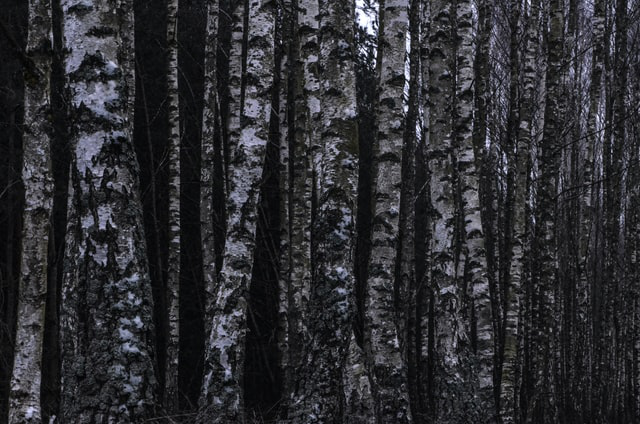

In [ ]:
a = Image.open(img_names[7])
a  # opening the image

In [ ]:
# making a list for all images 

img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True,show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
img_folder = "/photos"

def search(query,k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()
    


[{'corpus_id': 1717, 'score': 0.30776098370552063}, {'corpus_id': 384, 'score': 0.297361820936203}, {'corpus_id': 900, 'score': 0.2911415100097656}]
query:  plant
photos/lhPLeHgox9Q.jpg


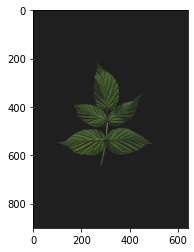

photos/xHqOVq9w8OI.jpg


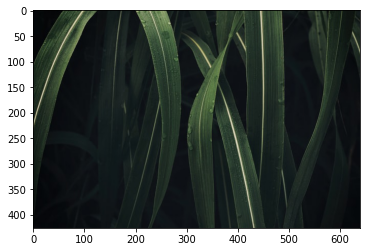

photos/YPgm3IH3e4o.jpg


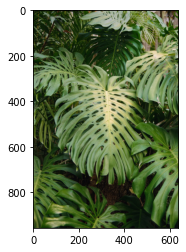

In [ ]:
search('plant')

# Project 2-
# Image Search from Hindi, Spanish, and French Text Data  

In [ ]:
from sentence_transformers import SentenceTransformer,util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
img_model = SentenceTransformer('clip-ViT-B-32')

In [ ]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True,show_progress_bar=True)

In [ ]:
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

In [ ]:
img_folder = "/photos"

def search(query,k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

[{'corpus_id': 147, 'score': 0.2884099781513214}, {'corpus_id': 1705, 'score': 0.2807803750038147}, {'corpus_id': 940, 'score': 0.2785559892654419}]
query:  बिल्ली
photos/-JrQwyTEIt0.jpg


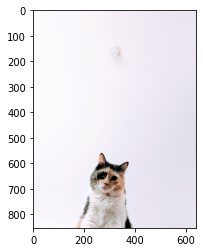

photos/c8yq39WBu3I.jpg


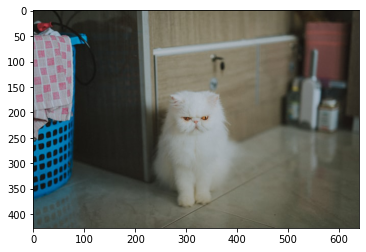

photos/BQolqSUXExk.jpg


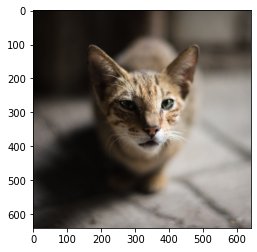

In [ ]:
search('बिल्ली')

 # Zero-Shot Learning
 
* Zero-Shot Learning is a Machine Learning paradigm where a pre-trained model is used to evaluate test data of classes that have not been used during training.
*  That is, a model needs to extend to new categories without any prior semantic information.
*  Such learning frameworks alleviate the need for retraining models.

In [ ]:
# dogcat dataset
# data:- https://github.com/laxmimerit/dog-cat-full-dataset.git

In [ ]:
from sentence_transformers import SentenceTransformer,util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 18.39 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (25001/25001), done.


In [ ]:
dog_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/dogs/*jpg'))[:100]
cat_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/cats/*jpg'))[:100]
img_names = dog_names + cat_names

In [ ]:
from random import shuffle
shuffle(img_names)


In [ ]:
img_names

In [ ]:
model = SentenceTransformer('clip-ViT-B-32') 

In [ ]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True,show_progress_bar=True)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
labels = ['dog', 'cat']

label_embed = model.encode(labels,convert_to_tensor=True)
cos_scores = util.cos_sim(img_embed, label_embed)

In [ ]:
cos_scores

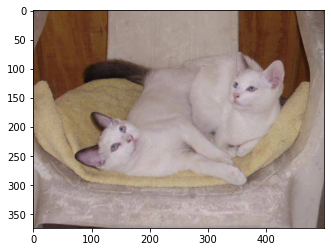

predicted Label: cat
------




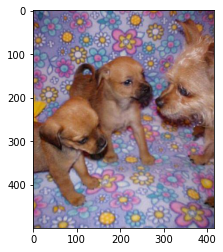

predicted Label: dog
------




In [ ]:
pred_labels = torch.argmax(cos_scores, dim=1)

for img_name, pred_label in zip(img_names[:2], pred_labels[:2]):
  im = Image.open(img_name)
  plt.figure()
  plt.imshow(im)
  plt.show()
  print("predicted Label:", labels[pred_label])
  print("------\n\n")